In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pumpkins = pd.read_csv('US-pumpkins.csv')

pumpkins_n = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins_n.head()

City Name Type               Package   Variety Sub Variety  Grade  \
70  BALTIMORE  NaN  1 1/9 bushel cartons  PIE TYPE         NaN    NaN   
71  BALTIMORE  NaN  1 1/9 bushel cartons  PIE TYPE         NaN    NaN   
72  BALTIMORE  NaN  1 1/9 bushel cartons  PIE TYPE         NaN    NaN   
73  BALTIMORE  NaN  1 1/9 bushel cartons  PIE TYPE         NaN    NaN   
74  BALTIMORE  NaN  1 1/9 bushel cartons  PIE TYPE         NaN    NaN   

       Date  Low Price  High Price  Mostly Low  ...  Unit of Sale Quality  \
70  9/24/16       15.0        15.0        15.0  ...           NaN     NaN   
71  9/24/16       18.0        18.0        18.0  ...           NaN     NaN   
72  10/1/16       18.0        18.0        18.0  ...           NaN     NaN   
73  10/1/16       17.0        17.0        17.0  ...           NaN     NaN   
74  10/8/16       15.0        15.0        15.0  ...           NaN     NaN   

   Condition Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  \
70       NaN        NaN     NaN   NaN      N         NaN          NaN   
71       NaN        NaN     NaN   NaN      N         NaN          NaN   
72       NaN        NaN     NaN   NaN      N         NaN          NaN   
73       NaN        NaN     NaN   NaN      N         NaN          NaN   
74       NaN        NaN     NaN   NaN      N         NaN          NaN   

    Unnamed: 25  
70          NaN  
71          NaN  
72          NaN  
73          NaN  
74          NaN  

[5 rows x 26 columns]

In [23]:
pumpkins_n.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [24]:
new_cols = ['Package', 'Month','Low Price', 'High Price', 'Date']

pumpkins_n = pumpkins_n.drop([c for c in pumpkins_n.columns if c not in new_cols], axis=1)

In [25]:
price = (pumpkins_n['Low Price'] + pumpkins_n['High Price'])/2

month = pd.DatetimeIndex(pumpkins_n['Date']).month

new_pumpkins = pd.DataFrame({'Month':month, 'Package':pumpkins_n['Package'], 'Low Price':pumpkins_n['Low Price'], 'High Price':pumpkins_n['High Price'], 'Price':price})
print(new_pumpkins.info())

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 70 to 1742
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int32  
 1   Package     415 non-null    object 
 2   Low Price   415 non-null    float64
 3   High Price  415 non-null    float64
 4   Price       415 non-null    float64
dtypes: float64(3), int32(1), object(1)
memory usage: 17.8+ KB
None


In [26]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [27]:
new_pumpkins.head()

Month               Package  Low Price  High Price  Price
70      9  1 1/9 bushel cartons       15.0        15.0   13.5
71      9  1 1/9 bushel cartons       18.0        18.0   16.2
72     10  1 1/9 bushel cartons       18.0        18.0   16.2
73     10  1 1/9 bushel cartons       17.0        17.0   15.3
74     10  1 1/9 bushel cartons       15.0        15.0   13.5

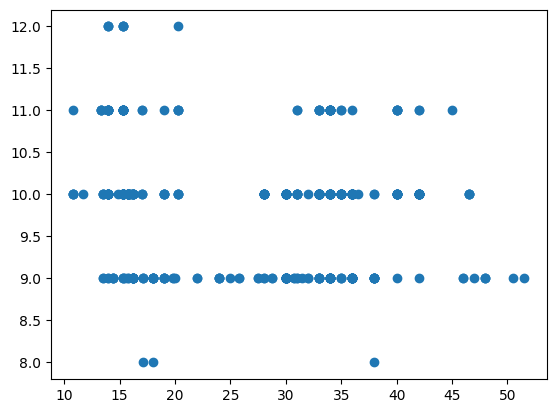

In [28]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price,month)
plt.show()

Text(0.5, 0, 'Month')

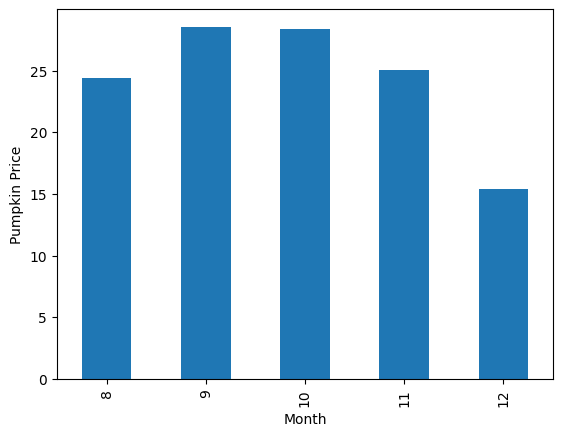

In [46]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")
plt.xlabel("Month")